In [1]:
import numpy as np
from torch.utils.data import Dataset, DataLoader
import h5py
from torchvision.datasets.mnist import FashionMNIST
from torchvision import transforms
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torchvision
from torchvision import models
import os
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm_notebook
import cv2

print(torch.__version__)
device = torch.device('cuda:0')

1.2.0


In [2]:
import seaborn as sns
import matplotlib.patheffects as PathEffects
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

def _scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))
    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    #sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[0])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([PathEffects.Stroke(linewidth=5, foreground="w"),
                            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txt

In [3]:
data_path = os.path.dirname(os.getcwd()) + "/data/"
class FashionMnistread(Dataset):
    def __init__(self, mode, transform=None):
        dataset = FashionMNIST(root=data_path, download=True, train=mode)
        data = getattr(dataset, 'train_data' if mode else 'data')
        labels = getattr(dataset, 'train_labels' if mode else 'targets')
        self.transform = transform
        self.input_images = np.array(data).astype(np.float)
        self.input_labels = np.array(labels).astype(np.long)

    def __len__(self):
        return (self.input_images.shape[0])

    def __getitem__(self, idx):
        images = self.input_images[idx]
        labels = self.input_labels[idx]
        if self.transform is not None:
            images = self.transform(images)
        return images, labels

In [4]:
Test_data = FashionMnistread(mode=False)
data = Test_data.input_images
labels = Test_data.input_labels

feature_maps = data[:10000].reshape([10000, 784])
labels = labels[:10000]

[0.29166946 0.17640666]


(<Figure size 576x576 with 1 Axes>,
 Text(-679.1286383782113, 1141.677264520639, '9'))

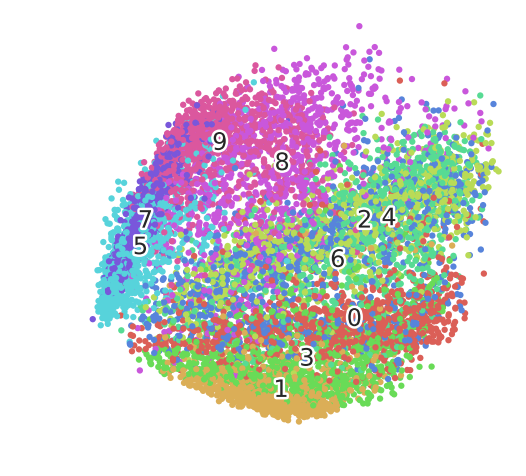

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(feature_maps)
print(pca.explained_variance_ratio_)
_scatter(pca_result, labels)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.026s...
[t-SNE] Computed neighbors for 10000 samples in 5.706s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 315.559721
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.615150
[t-SNE] KL divergence after 300 iterations: 2.758030


(<Figure size 576x576 with 1 Axes>,
 Text(5.1184483, -8.068951, '9'))

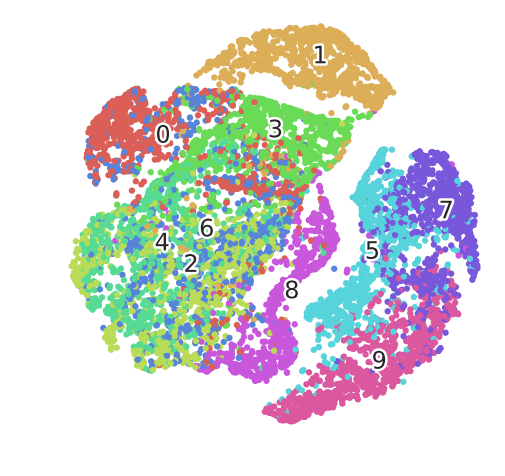

In [7]:
from sklearn.manifold import TSNE

pca = PCA(n_components=100)
pca_result = pca.fit_transform(feature_maps)
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=300).fit_transform(pca_result)
_scatter(tsne, labels)